# **Final**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Load the Dataset**

In [2]:
# Load dataset
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# dimensions of the dataframe
df.shape

(13320, 9)

we have 13320 data with, 9 parameters.

9 Parametrs are;

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


**Drop unwanted features**

* area_type
* availability
* society
* balcony

Those are not considerd as a critical factors when choosing a house.

In [7]:
# Drop irrelevant columns
df.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)

**Data cleaning**

In [8]:
# Find the features that unavailable in the data
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


* There are 73 houses without bathrooms,
Drop that houses from the dataset because bathrooms are critical thing.

In [9]:
# Drop datapoints with missing values
df.dropna(inplace=True)

In [10]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df.shape

(13246, 5)

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

* Size is assigned in both **BHK** and **Bedroom** names. This may can lead to error when training.
* Create a new column named **BHK (Bedroom, Hall, Kitchen)** for clarify that problem.

* A typical 1BHK house/flat usually ranges between 400 to 600 sq. ft.
* 1BHK = 1 Bedroom, 1 Hall, 1 Kitchen
* 2BHK = 2 Bedrooms, 1 Hall, 1 Kitchen
* 3BHK = 3 Bedrooms, 1 Hall, 1 Kitchen

In [13]:
# Convert 'size' into BHK (Bedrooms, Hall, Kitchen)
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Check the range of BHK category
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

Check any mismatches in the features

In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

image.png
* For values given in Range format as above, get a single value by taking the average

In [15]:
# Convert 'total_sqft' to numeric (handling ranges)
def convert_sqft_to_num(sqft):
    try:
        return float(sqft)
    except:
        values = sqft.split('-')
        return (float(values[0]) + float(values[1])) / 2 if len(values) == 2 else None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(subset=['total_sqft'], inplace=True)  # Drop rows where conversion failed

# Create price_per_sqft feature
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Encode categorical feature 'location'
# Converts location names into a numeerical labels
encoder = LabelEncoder()
df['location'] = encoder.fit_transform(df['location'])


# Select relevant features (total_sqft, BHK, bathrooms, and location as input features)
features = ['total_sqft', 'BHK', 'bath', 'location']
X = df[features]
df['price'] = np.log1p(df['price'])  # Apply log transformation to price
y = df['price']

df = pd.get_dummies(df, columns=['location'], drop_first=True)  # One-hot encode location



---



In [16]:
location_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(location_mapping)

{' Anekal': 0, ' Banaswadi': 1, ' Basavangudi': 2, ' Bhoganhalli': 3, ' Devarabeesana Halli': 4, ' Devarachikkanahalli': 5, ' Electronic City': 6, ' Mysore Highway': 7, ' Rachenahalli': 8, ' Sector 1 HSR Layout': 9, ' Thanisandra': 10, ' Whitefield': 11, ' ittamadu': 12, ' south': 13, '1 Annasandrapalya': 14, '1 Giri Nagar': 15, '1 Immadihalli': 16, '1 Ramamurthy Nagar': 17, '12th cross srinivas nagar banshankari 3rd stage': 18, '1A Block Koramangala': 19, '1Channasandra': 20, '1Hanuman Nagar': 21, '1Hoysalanagar': 22, '1Kasavanhalli': 23, '1st Block BEL Layout': 24, '1st Block HBR Layout': 25, '1st Block HRBR Layout': 26, '1st Block Jayanagar': 27, '1st Block Koramangala': 28, '1st Phase JP Nagar': 29, '1st Stage Domlur': 30, '1st Stage Indira Nagar': 31, '1st Stage Radha Krishna Layout': 32, '2Electronic City Phase II': 33, '2nd Block Bel Layout': 34, '2nd Block Hbr Layout': 35, '2nd Block Hrbr Layout': 36, '2nd Block Jayanagar': 37, '2nd Block Koramangala': 38, '2nd Phase JP Nagar':

In [17]:
# user_location = "Whitefield"  # Example input
# if user_location in location_mapping:
#     encoded_location = location_mapping[user_location]
#     print(f"Encoded location for '{user_location}': {encoded_location}")
# else:
#     print("Location not found in dataset")
def encoded_location(user_location):
  if user_location in location_mapping:
    encoded_location = location_mapping[user_location]
    # print(f"Encoded location for '{user_location}': {encoded_location}")
  else:
    print("Location not found in dataset")

  return encoded_location

In [18]:
df.shape

(13200, 1303)

**Data Preprocessing**

In [19]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessed successfully!")

Data preprocessed successfully!


In [20]:
X.head(3)

,total_sqft,BHK,bath,location
0,1056.0,2,2.0,416
1,2600.0,4,5.0,314
2,1440.0,3,2.0,1173




---



**Build the Neural Network Model**

A **3-layer neural network** is built with: <br>
* Input Layer -> 4 features (total_sqft, BHK, bath, location), 64 neurons with ReLU activation<br>
* Hidden Layers    -> 2 layers, 32 neurons with ReLU activation <br>
* Output Layer     -> 1 neuron (predicting house price) <br>
* Loss Function    -> Mean Squared Error (MSE) since this is a regression task <br>
* Optimizer        -> Adam

In [21]:
pip install --upgrade tensorflow

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer (Predicting price)
])


from tensorflow.keras.regularizers import l2
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),  # L2 Regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [24]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

**Train the neural network**

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8.3464 - mae: 2.2384 - val_loss: 0.9074 - val_mae: 0.3978
Epoch 2/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8367 - mae: 0.3625 - val_loss: 0.6364 - val_mae: 0.3138
Epoch 3/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5995 - mae: 0.3070 - val_loss: 0.5459 - val_mae: 0.3093
Epoch 4/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5177 - mae: 0.3011 - val_loss: 0.4804 - val_mae: 0.3072
Epoch 5/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4563 - mae: 0.2970 - val_loss: 0.4147 - val_mae: 0.2933
Epoch 6/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.4101 - mae: 0.2991 - val_loss: 0.3628 - val_mae: 0.2887
Epoch 7/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3630 - mae: 0.2949 - val_loss: 0.3354 - val_mae: 0.2918
Epoch 8/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3446 - mae: 0.2994 - val_loss: 0.3056 - val_mae: 0.2906
Epoch 9/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 

**Evaluate the model**

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 0.29
Root Mean Squared Error (RMSE): 0.38
R² Score: 0.7080


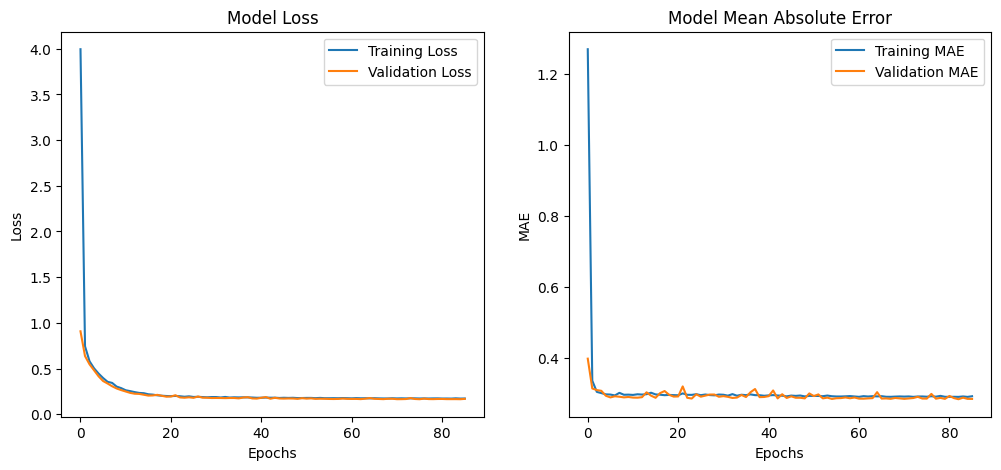

In [27]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    #  Loss Plot
    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Model Loss')
    ax[0].legend()

    #  MAE Plot
    ax[1].plot(history.history['mae'], label='Training MAE')
    ax[1].plot(history.history['val_mae'], label='Validation MAE')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('MAE')
    ax[1].set_title('Model Mean Absolute Error')
    ax[1].legend()

    plt.show()

# Call the function to plot
plot_training_history(history)

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

In [29]:
X.head(3)

,total_sqft,BHK,bath,location
0,1056.0,2,2.0,416
1,2600.0,4,5.0,314
2,1440.0,3,2.0,1173


In [30]:
num_location = encoded_location("Whitefield")
print(num_location)
example_input = np.array([[1200, 2, 2, num_location]])  # Replace with actual values
example_input_scaled = scaler.transform(example_input)  # Ensure it's scaled properly
predicted_price = model.predict(example_input_scaled)
print("Predicted Price:", np.expm1(predicted_price)[0])  # Convert log price back to original scale


1246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Price: [60.01052]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
example_input = np.array([[1200, 2, 2, 15]])  # Replace with actual values
example_input_scaled = scaler.transform(example_input)
predicted_price = model_rf.predict(example_input_scaled)
print("Predicted Price:", np.expm1(predicted_price)[0])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Price: 77.15736057349449


In [32]:
example_input = np.array([[1200, 2, 2, 15]])  # Replace with actual values
example_input_scaled = scaler.transform(example_input)
predicted_price = model_xgb.predict(example_input_scaled)
print("Predicted Price:", np.expm1(predicted_price)[0])


Predicted Price: 73.46537


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Neural Network
y_pred_nn = model.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

# Evaluate Random Forest
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate XGBoost
y_pred_xgb = model_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"Neural Network -> MAE: {mae_nn:.2f}, RMSE: {rmse_nn:.2f}, R²: {r2_nn:.4f}")
print(f"Random Forest -> MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")
print(f"XGBoost -> MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.4f}")


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network -> MAE: 0.29, RMSE: 0.38, R²: 0.7080
Random Forest -> MAE: 0.23, RMSE: 0.34, R²: 0.7648
XGBoost -> MAE: 0.24, RMSE: 0.33, R²: 0.7745


In [34]:
df.shape

(13200, 1303)

In [35]:
num_location = encoded_location("Anekal")
print(num_location)
example_input = np.array([[1200, 2, 2, num_location]])  # Replace with actual values
example_input_scaled = scaler.transform(example_input)  # Ensure it's scaled properly
predicted_price = model.predict(example_input_scaled)
print("Predicted Price:", np.expm1(predicted_price)[0])  # Convert log price back to original scale

124
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Price: [56.98089]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


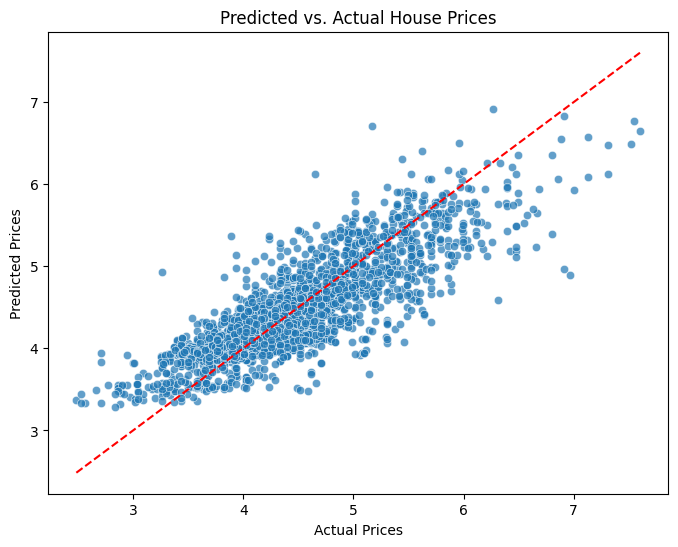

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure y_test and y_pred are 1D arrays
y_test_1d = np.ravel(y_test)  # Converts to 1D if needed
y_pred_1d = np.ravel(y_pred)  # Converts to 1D if needed

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_1d, y=y_pred_1d, alpha=0.7)

# Plot the ideal line where predicted = actual
plt.plot([min(y_test_1d), max(y_test_1d)], [min(y_test_1d), max(y_test_1d)], linestyle='--', color='red')

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual House Prices")
plt.show()


In [38]:
num_location = encoded_location("Thanisandra")
print(num_location)

1142
